# DAMASK tutorial
- creating necessary inputs for damask
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
%matplotlib inline

In [2]:
pr = Project("damask_proj")

In [3]:
pr.remove_jobs(silently=True) # remove the old or existing folder

  0%|          | 0/1 [00:00<?, ?it/s]

## Creating the Damask job

In [4]:
job = pr.create.job.DAMASK("damask_job")

## Creating the necessary inputs

In [5]:
grains=8;grids=16 # defines the number of grains and grids

### Homogenization

In [6]:
homogenization = pr.create.DAMASK.homogenization(method='SX', 
                                                 parameters={'N_constituents': 1,
                                                             "mechanical": {"type": "pass"}})

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/project.py:87: UserWarning: Setting homogenization via project creator is deprecated. Use job.set_homogenization instead
  warnings.warn(


In [7]:
homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

### Elasticity

In [8]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

### Plasticity

In [9]:
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12],a_sl=[2.25],
                                            atol_xi=1.0,dot_gamma_0_sl=[0.001],
                                            h_0_sl_sl=[75.0e6],
                                            h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=[20],
                                            output=['xi_sl'],
                                            xi_0_sl=[31.0e6],
                                            xi_inf_sl=[63.0e6]
                                           )  

### Phase

In [10]:
phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity, plasticity=plasticity)

### Rotation

In [11]:
rotation = pr.continuum.damask.Rotation(shape=grains)

### Material

In [12]:
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

In [13]:
job.material = material

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:174: UserWarning: Setting material via project creator is deprecated. Use job.set_material instead
  warnings.warn(


### Grid

In [14]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, spatial_discretization=grids, num_grains=grains)

In [15]:
job.grid = grid

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:222: UserWarning: Setting grid via project creator is deprecated. Use job.set_grid instead
  warnings.warn(


### Loading

In [16]:
load_step =[{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                            'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 10.,'N': 40},
            'additional': {'f_out': 4}
           },{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                              'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 60.,'N': 60},
            'additional': {'f_out': 4}
           }]

In [17]:
solver = job.list_solvers()[0]

In [18]:
job.loading = pr.continuum.damask.Loading(solver=solver, load_steps=load_step)

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:233: UserWarning: Setting loading via project creator is deprecated. Use job.set_loading instead
  warnings.warn(


## Runing the job

In [19]:
job.run()

The job damask_job was saved and received the ID: 7934


In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,7934,finished,None,damask_job,/damask_job,None,/home/jovyan/dev/pyiron_continuum/notebooks/damask_proj/,2024-05-15 21:21:29.700887,2024-05-15 21:23:37.321152,127.0,pyiron@f89e278dea52#1,DAMASK,0.4,None,None


## Post-processing

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varepsilon_z$$_z$', ylabel='$\\sigma_z$$_z$(Pa)'>)

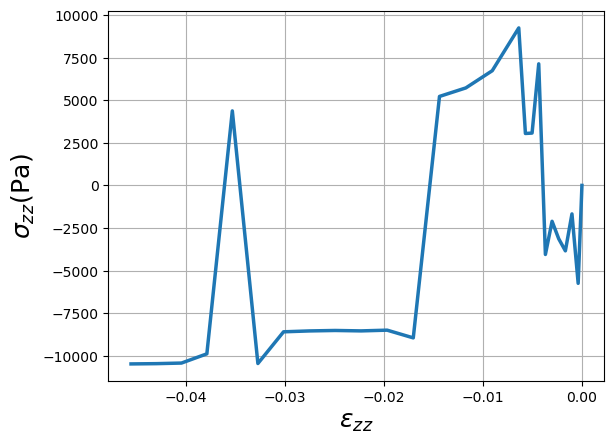

In [21]:
job.plot_stress_strain(component='zz')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varepsilon_{vM}$', ylabel='$\\sigma_{vM}$ (Pa)'>)

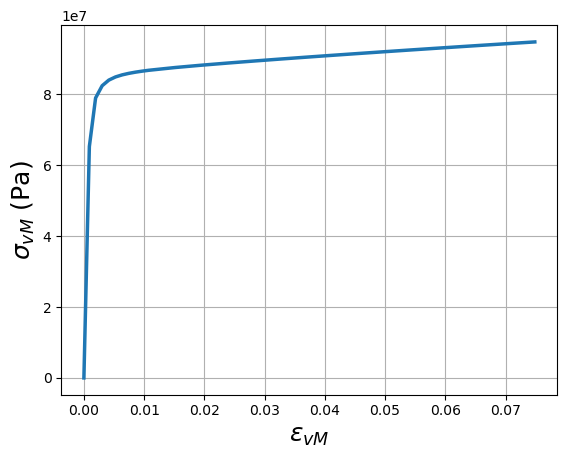

In [22]:
job.plot_stress_strain(von_mises=True)

In [23]:
job.output.stress

array([[[ 3.32726354e-05,  1.11962962e-06, -1.75669088e-06],
        [ 1.11962962e-06,  2.80835434e-05,  2.02871581e-06],
        [-1.75669088e-06,  2.02871581e-06,  2.53669958e-05]],

       [[ 6.50816317e+07,  4.38585366e+05, -6.69326107e+05],
        [ 4.38585366e+05, -5.42153838e+03,  5.95099833e+05],
        [-6.69326107e+05,  5.95099833e+05, -5.74540368e+03]],

       [[ 7.66210405e+07, -1.10274845e+06, -3.75889116e+06],
        [-1.10274845e+06, -5.02670971e+02,  2.54342082e+06],
        [-3.75889116e+06,  2.54342082e+06, -1.67157960e+03]],

       [[ 7.82915619e+07, -1.57424726e+06, -5.03613233e+06],
        [-1.57424726e+06, -5.19449577e+03,  3.55866574e+06],
        [-5.03613233e+06,  3.55866574e+06, -3.83973578e+03]],

       [[ 7.88776074e+07, -1.72079576e+06, -5.28610400e+06],
        [-1.72079576e+06,  5.12177850e+02,  3.97405757e+06],
        [-5.28610400e+06,  3.97405757e+06, -3.13389504e+03]],

       [[ 7.91879987e+07, -1.76328178e+06, -5.32469005e+06],
        [-1.76